In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow import keras


In [8]:
df = pd.read_csv("Churn_Modelling.csv")

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.drop(["RowNumber" ,"CustomerId","Surname"] , axis=1 , inplace=True)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Geography = le.fit_transform(df.Geography)

In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
x=df.drop("Exited" , axis=1)
y = df["Exited"]

In [25]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
model = keras.Sequential(
    [
        keras.layers.Dense(13,input_shape=(10,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ]
)
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])
model.fit(x_train , y_train , epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5899 - accuracy: 0.6925
Epoch 2/100
250/250 [==============================] - 0s 990us/step - loss: 0.4532 - accuracy: 0.7995
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8127
Epoch 4/100
250/250 [==============================] - 0s 943us/step - loss: 0.4120 - accuracy: 0.8319
Epoch 5/100
250/250 [==============================] - 0s 931us/step - loss: 0.3952 - accuracy: 0.8415
Epoch 6/100
250/250 [==============================] - 0s 931us/step - loss: 0.3805 - accuracy: 0.8479
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8521
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8536
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8537
Epoch 10/100
250/250 [==============================] - 0s 936us/step - loss: 0.355

Epoch 80/100
250/250 [==============================] - 0s 833us/step - loss: 0.3228 - accuracy: 0.8661
Epoch 81/100
250/250 [==============================] - 0s 885us/step - loss: 0.3230 - accuracy: 0.8643
Epoch 82/100
250/250 [==============================] - 0s 878us/step - loss: 0.3221 - accuracy: 0.8662
Epoch 83/100
250/250 [==============================] - 0s 878us/step - loss: 0.3222 - accuracy: 0.8662
Epoch 84/100
250/250 [==============================] - 0s 878us/step - loss: 0.3225 - accuracy: 0.8658
Epoch 85/100
250/250 [==============================] - 0s 816us/step - loss: 0.3227 - accuracy: 0.8664
Epoch 86/100
250/250 [==============================] - 0s 897us/step - loss: 0.3238 - accuracy: 0.8668
Epoch 87/100
250/250 [==============================] - 0s 887us/step - loss: 0.3217 - accuracy: 0.8668
Epoch 88/100
250/250 [==============================] - 0s 815us/step - loss: 0.3231 - accuracy: 0.8650
Epoch 89/100
250/250 [==============================] - 0s 878us

In [44]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 853us/step - loss: 66715.1953 - accuracy: 0.2075


[66715.1953125, 0.20749999582767487]

In [46]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 734us/step


In [49]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
df_pred = pd.DataFrame({"actual" : y_test , "predicated" : y_pred})
df_pred.head(10)

,actual,predicated
9953,0,1
3850,0,1
4962,0,1
3886,0,1
5437,0,1
8517,0,1
2041,0,1
1989,0,1
1933,0,1
9984,0,1


In [51]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_pred)

Text(69.0, 0.5, 'Actual')

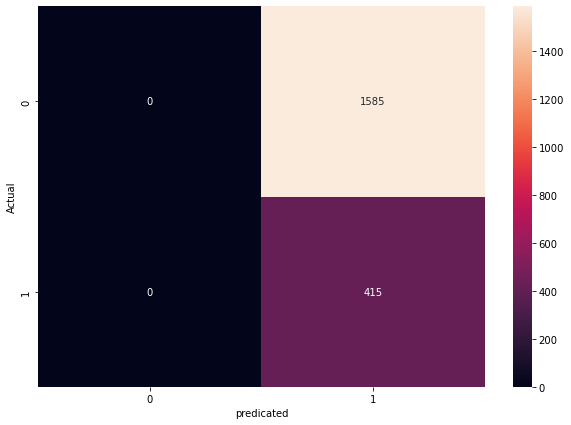

In [54]:

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicated")
plt.ylabel("Actual")